# Pre-Train Model

In [12]:
import torch
import torch.nn as nn
from torchvision import models, transforms
from PIL import Image

In [3]:
alexnet = models.AlexNet()

In [4]:
resnet = models.resnet101(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth


In [5]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [6]:
preprocess = transforms.Compose([
                                 transforms.Resize(256),
                                 transforms.CenterCrop(224),
                                 transforms.ToTensor(),
                                 transforms.Normalize(
                                     mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225]
                                 )
])

In [7]:
img = Image.open('dog.jpg')

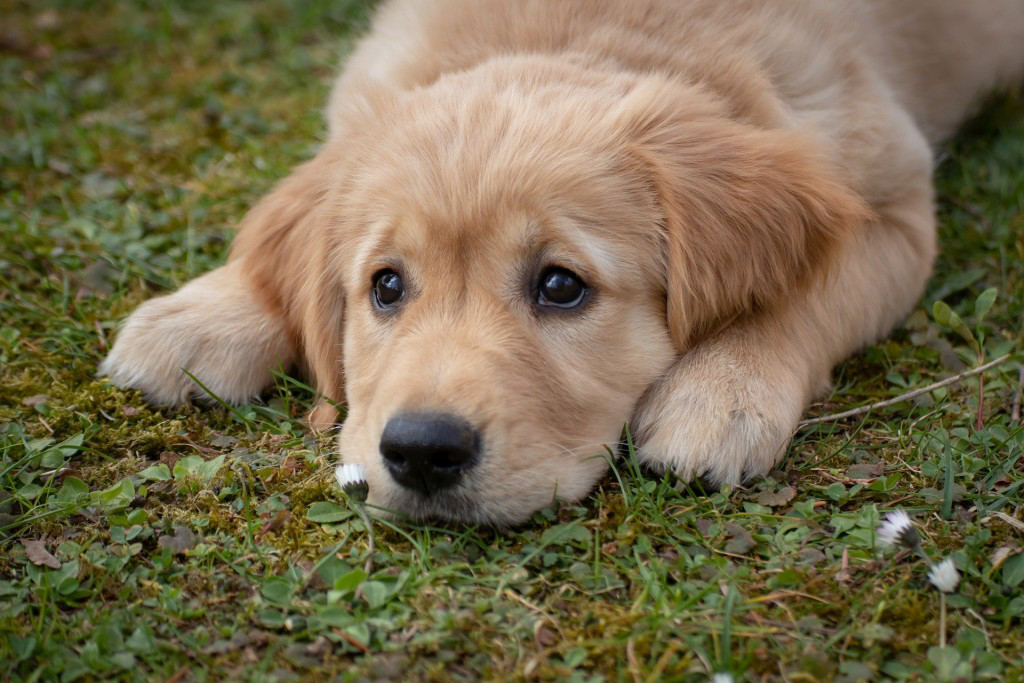

In [8]:
img

In [9]:
img_t = preprocess(img)

In [10]:
img_t.shape

torch.Size([3, 224, 224])

In [13]:
batch_t = torch.unsqueeze(img_t, 0)
batch_t.shape

torch.Size([1, 3, 224, 224])

In [14]:
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [15]:
out = resnet(batch_t)
out

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


tensor([[-1.3398e+00, -1.5260e+00, -2.3773e+00, -4.1298e+00, -3.3725e+00,
         -1.3631e+00, -2.6212e+00, -3.2069e+00, -4.1083e-01, -3.6367e+00,
         -9.9645e-01, -1.9113e+00, -2.7388e+00, -3.1496e+00, -2.0743e+00,
         -3.4748e+00, -4.3457e+00, -6.2755e-01, -1.0201e+00, -1.7086e+00,
         -3.0796e+00, -3.7785e+00, -1.2116e+00, -7.3226e-01, -1.5655e+00,
         -3.0823e-01, -1.7308e+00, -2.1609e+00, -3.6724e-01, -1.0409e+00,
         -2.0108e+00, -2.0981e+00, -1.4580e+00, -1.5437e+00,  1.1282e+00,
         -1.3808e+00,  4.7726e-01, -1.1165e+00,  2.1008e-01,  1.5808e-01,
         -1.1426e+00, -4.6305e-01,  1.2645e+00, -1.3237e+00, -9.6850e-01,
         -1.0813e+00,  5.1876e-01, -1.5621e-02, -3.1905e+00, -1.2027e+00,
         -8.2120e-01, -2.1966e+00,  7.1545e-01,  2.5961e-01,  1.6321e-01,
         -1.5166e-01,  1.7660e+00, -3.1527e-01, -1.5790e+00,  3.8035e-01,
          2.5689e+00, -7.2587e-01,  1.5770e+00, -2.5047e-02, -5.1702e-01,
         -9.6468e-01,  2.4251e-01,  1.

In [16]:
with open('imagenet1000_clsidx_to_labels.txt') as f:
    labels = [line.strip() for line in f.readlines()]

In [17]:
_, index = torch.max(out, 1)

In [21]:
perentage = nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], perentage[index[0]].item()

("207: 'golden retriever',", 99.35382843017578)

In [22]:
_, indices = torch.sort(out, descending=True)
[(labels[idx], perentage[idx].item()) for idx in indices[0][:5]]

[("207: 'golden retriever',", 99.35382843017578),
 ("208: 'Labrador retriever',", 0.34824755787849426),
 ("244: 'Tibetan mastiff',", 0.0859401598572731),
 ("539: 'doormat, welcome mat',", 0.060065917670726776),
 ("231: 'collie',", 0.021250512450933456)]

# GAN (Generative Adversarial Network)

## CycleGAN

In [4]:
import torch
import torch.nn as nn
from torchvision import models

In [9]:
class ResNetBlock(nn.Module): # <1>

    def __init__(self, dim):
        super(ResNetBlock, self).__init__()
        self.conv_block = self.build_conv_block(dim)

    def build_conv_block(self, dim):
        conv_block = []

        conv_block += [nn.ReflectionPad2d(1)]

        conv_block += [nn.Conv2d(dim, dim, kernel_size=3, padding=0, bias=True),
                       nn.InstanceNorm2d(dim),
                       nn.ReLU(True)]

        conv_block += [nn.ReflectionPad2d(1)]

        conv_block += [nn.Conv2d(dim, dim, kernel_size=3, padding=0, bias=True),
                       nn.InstanceNorm2d(dim)]

        return nn.Sequential(*conv_block)

    def forward(self, x):
        out = x + self.conv_block(x) # <2>
        return out

In [10]:
class ResNetGenerator(nn.Module):
    def __init__(self, input_nc=3, output_nc=3, ngf=64, n_blocks=9):
        assert(n_blocks >= 0)
        super(ResNetGenerator, self).__init__()
        
        self.input_nc = input_nc
        self.output_nc = output_nc
        self.ngf = ngf

        model = [nn.ReflectionPad2d(3),
                 nn.Conv2d(input_nc, ngf, kernel_size=7, padding=0, bias=True),
                 nn.InstanceNorm2d(ngf),
                 nn.ReLU(True)]

        n_downsampling = 2
        for i in range(n_downsampling):
            mult = 2**i
            model += [nn.Conv2d(ngf * mult, ngf * mult * 2, kernel_size=3,
                                stride=2, padding=1, bias=True),
                      nn.InstanceNorm2d(ngf * mult * 2),
                      nn.ReLU(True)]

        mult = 2**n_downsampling
        for i in range(n_blocks):
            model += [ResNetBlock(ngf * mult)]

        for i in range(n_downsampling):
            mult = 2**(n_downsampling - i)
            model += [nn.ConvTranspose2d(ngf * mult, int(ngf * mult / 2),
                                         kernel_size=3, stride=2,
                                         padding=1, output_padding=1,
                                         bias=True),
                      nn.InstanceNorm2d(int(ngf * mult / 2)),
                      nn.ReLU(True)]

        model += [nn.ReflectionPad2d(3)]
        model += [nn.Conv2d(ngf, output_nc, kernel_size=7, padding=0)]
        model += [nn.Tanh()]

        self.model = nn.Sequential(*model)

    def forward(self, input): # <3>
        return self.model(input)

In [11]:
netG = ResNetGenerator()